In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *     # für Druckplots benötigt
from matplotlib import cm
import matplotlib.lines as mlines

import numpy as np                     # für für Arrays benötigt
from numpy import pi, sin, cos, array, transpose, dot
from numpy import radians, degrees, set_printoptions

We use the geological convention that will help us analyze triaxial stress tests on plugs.

[![SDSU](http://www.geology.sdsu.edu/visualstructure/vsg/visualstress_html/figure18.GIF) SDSU Visual stress](http://www.geology.sdsu.edu/visualstructure/vsg/visualstress_html/chapter6_4.htm)

In [2]:
sigma1 = np.array([64.3, 16.2, 43,60])
sigma3 = np.array([4,2,8,20])
theta = np.array([36,15,89,15])
p0=15

In [3]:
cf1 = 20.0                        # Cohesion C [MPa] 
muef1 = 0.5                      # coefficient of friction  [MPa]

In [10]:
def sigmify(sigma1, sigma3, p0):
    return (sigma1+sigma3-p0)/2, (sigma1-sigma3)/2

def deg2rad(angle):
    return pi*angle/180

def scales(sigma1,sigma3,p0):
    p,q = sigmify(sigma1,sigma3,p0)
    min_scale = np.min([0,int(np.floor(np.min(p-q)/10)*10)])
    max_scale = int(1+np.ceil(max(sigma1)*1.25/10)*10)
    return min_scale,max_scale

In [15]:
## Plotting ## 
def plot_mohr(sigma1,sigma3,p0,theta,cf1,muef1):
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    
    sig_midpoint,sig_radius = sigmify(sigma1,sigma3,p0)
    min_scale,max_scale = scales(sigma1,sigma3,p0)
    
    plt.plot([min_scale,max_scale], [muef1*min_scale+cf1, muef1*max_scale+cf1], "k", linewidth=1, linestyle="-", label="Failure Crit")
    ax.axis('scaled')
    for y,sigma in enumerate(sigma1):
        color_picker=[k for k in cm.colors.BASE_COLORS.keys() if k!="w"][y%7]
        mohr1=plt.Circle((sig_midpoint[y],0), radius=sig_radius[y], color=color_picker, fill=False, label = "Mohr Circle "+str(y+1))
        plt.plot([sig_midpoint[y], sig_midpoint[y]+sig_radius[y]*cos(deg2rad(theta[y]*2))], [0, sig_radius[y]*sin(deg2rad(theta[y]*2))], color_picker, linewidth=1, linestyle="-", label="Fault Plane "+str(y+1))
        ax.add_patch(mohr1)
    plt.title('Effective Stresses')
    ax.set_xlabel('$\sigma$ [MPa]', fontsize=12)
    ax.set_ylabel('$\tau$ [MPa]', fontsize=12)
    ax.set_xlim([min_scale,max_scale])
    plt.xticks(range(min_scale, max_scale, 10))
    plt.yticks(range(0, int(np.ceil(.2*(muef1*max_scale+cf1))*5)+1, 5))
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints = 1)
    
    plt.show()

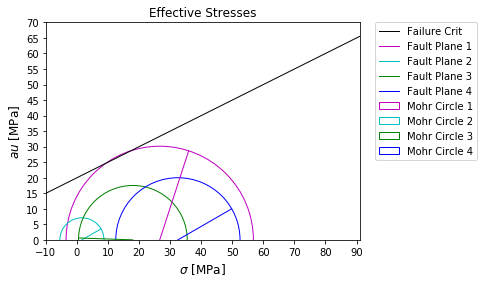

In [16]:
plot_mohr(sigma1,sigma3,p0,theta,cf1,muef1)